In [1]:
# Load libraries
import numpy as np
from numpy import arange
import pandas as pd
from pandas import set_option
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error

In [3]:
from sklearn import datasets
# Load dataset
diabetes_data = datasets.load_diabetes()
dataset = pd.DataFrame(diabetes_data.data, 
columns=diabetes_data.feature_names)
dataset['target'] = pd.Series(diabetes_data.target)

In [4]:
# shape
print(dataset.shape)
# types
print(dataset.dtypes)
# head
print(dataset.head(20))

(442, 11)
age       float64
sex       float64
bmi       float64
bp        float64
s1        float64
s2        float64
s3        float64
s4        float64
s5        float64
s6        float64
target    float64
dtype: object
         age       sex       bmi        bp        s1        s2        s3  \
0   0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1  -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2   0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3  -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4   0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
5  -0.092695 -0.044642 -0.040696 -0.019442 -0.068991 -0.079288  0.041277   
6  -0.045472  0.050680 -0.047163 -0.015999 -0.040096 -0.024800  0.000779   
7   0.063504  0.050680 -0.001895  0.066629  0.090620  0.108914  0.022869   
8   0.041708  0.050680  0.061696 -0.040099 -0.013953  0.006202 -0.028674   
9  -0.070900 -0.04

In [5]:
# descriptions
set_option('display.precision', 3)
print(dataset.describe())
# correlation
print(dataset.corr(method='pearson'))

             age        sex        bmi         bp         s1         s2  \
count  4.420e+02  4.420e+02  4.420e+02  4.420e+02  4.420e+02  4.420e+02   
mean  -2.512e-19  1.231e-17 -2.246e-16 -4.798e-17 -1.381e-17  3.918e-17   
std    4.762e-02  4.762e-02  4.762e-02  4.762e-02  4.762e-02  4.762e-02   
min   -1.072e-01 -4.464e-02 -9.028e-02 -1.124e-01 -1.268e-01 -1.156e-01   
25%   -3.730e-02 -4.464e-02 -3.423e-02 -3.666e-02 -3.425e-02 -3.036e-02   
50%    5.383e-03 -4.464e-02 -7.284e-03 -5.670e-03 -4.321e-03 -3.819e-03   
75%    3.808e-02  5.068e-02  3.125e-02  3.564e-02  2.836e-02  2.984e-02   
max    1.107e-01  5.068e-02  1.706e-01  1.320e-01  1.539e-01  1.988e-01   

              s3         s4         s5         s6   target  
count  4.420e+02  4.420e+02  4.420e+02  4.420e+02  442.000  
mean  -5.777e-18 -9.043e-18  9.294e-17  1.130e-17  152.133  
std    4.762e-02  4.762e-02  4.762e-02  4.762e-02   77.093  
min   -1.023e-01 -7.639e-02 -1.261e-01 -1.378e-01   25.000  
25%   -3.512e-02 -3

array([[<AxesSubplot:xlabel='age', ylabel='age'>,
        <AxesSubplot:xlabel='sex', ylabel='age'>,
        <AxesSubplot:xlabel='bmi', ylabel='age'>,
        <AxesSubplot:xlabel='bp', ylabel='age'>,
        <AxesSubplot:xlabel='s1', ylabel='age'>,
        <AxesSubplot:xlabel='s2', ylabel='age'>,
        <AxesSubplot:xlabel='s3', ylabel='age'>,
        <AxesSubplot:xlabel='s4', ylabel='age'>,
        <AxesSubplot:xlabel='s5', ylabel='age'>,
        <AxesSubplot:xlabel='s6', ylabel='age'>,
        <AxesSubplot:xlabel='target', ylabel='age'>],
       [<AxesSubplot:xlabel='age', ylabel='sex'>,
        <AxesSubplot:xlabel='sex', ylabel='sex'>,
        <AxesSubplot:xlabel='bmi', ylabel='sex'>,
        <AxesSubplot:xlabel='bp', ylabel='sex'>,
        <AxesSubplot:xlabel='s1', ylabel='sex'>,
        <AxesSubplot:xlabel='s2', ylabel='sex'>,
        <AxesSubplot:xlabel='s3', ylabel='sex'>,
        <AxesSubplot:xlabel='s4', ylabel='sex'>,
        <AxesSubplot:xlabel='s5', ylabel='sex'>,
        <

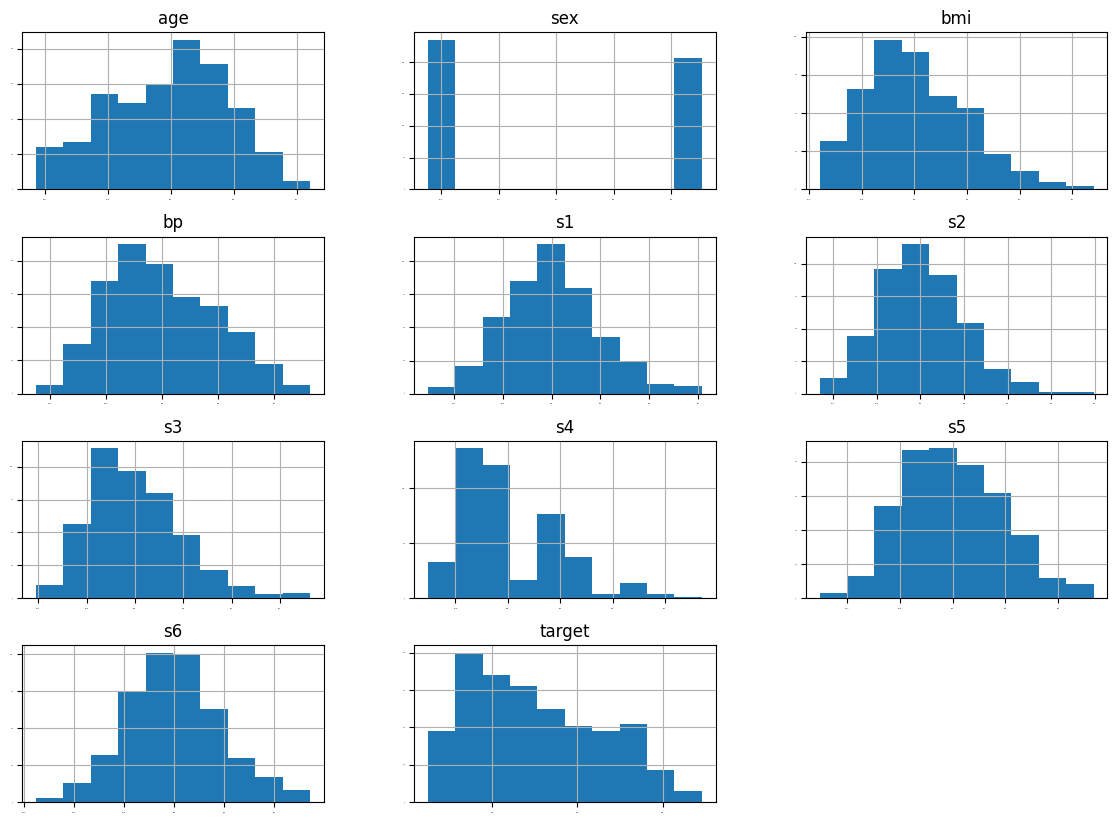

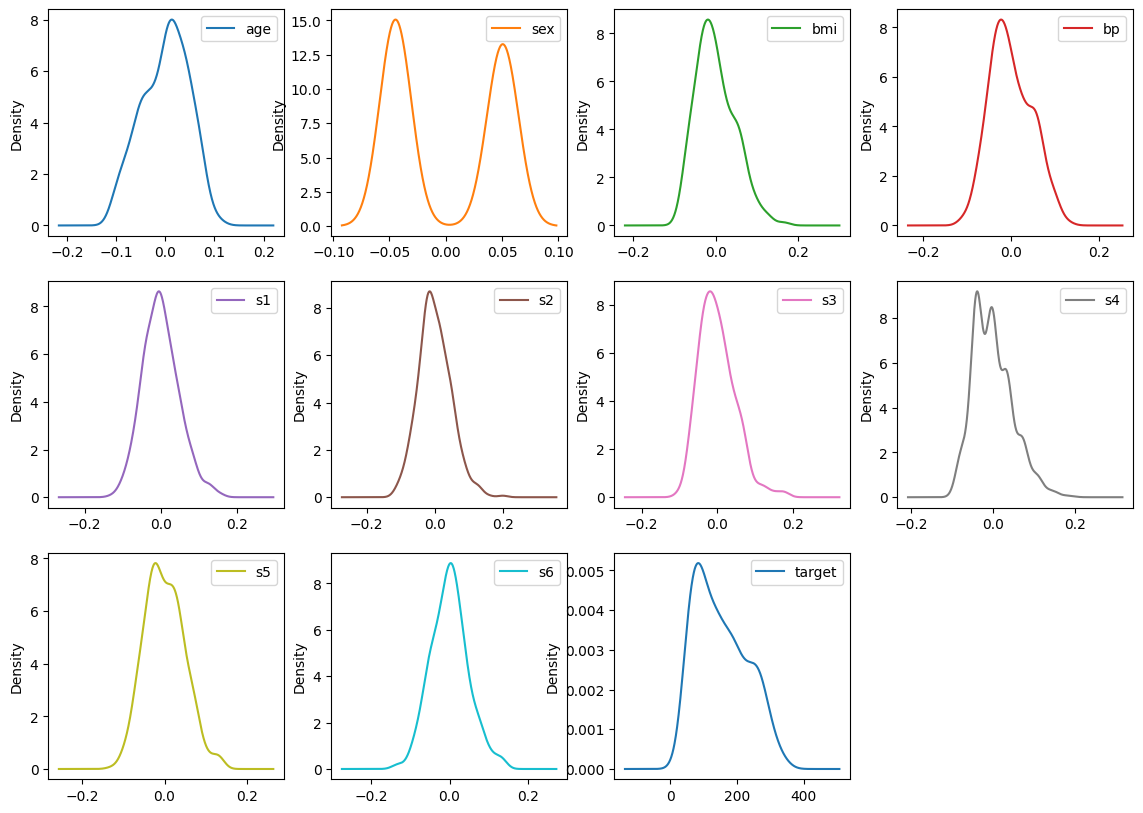

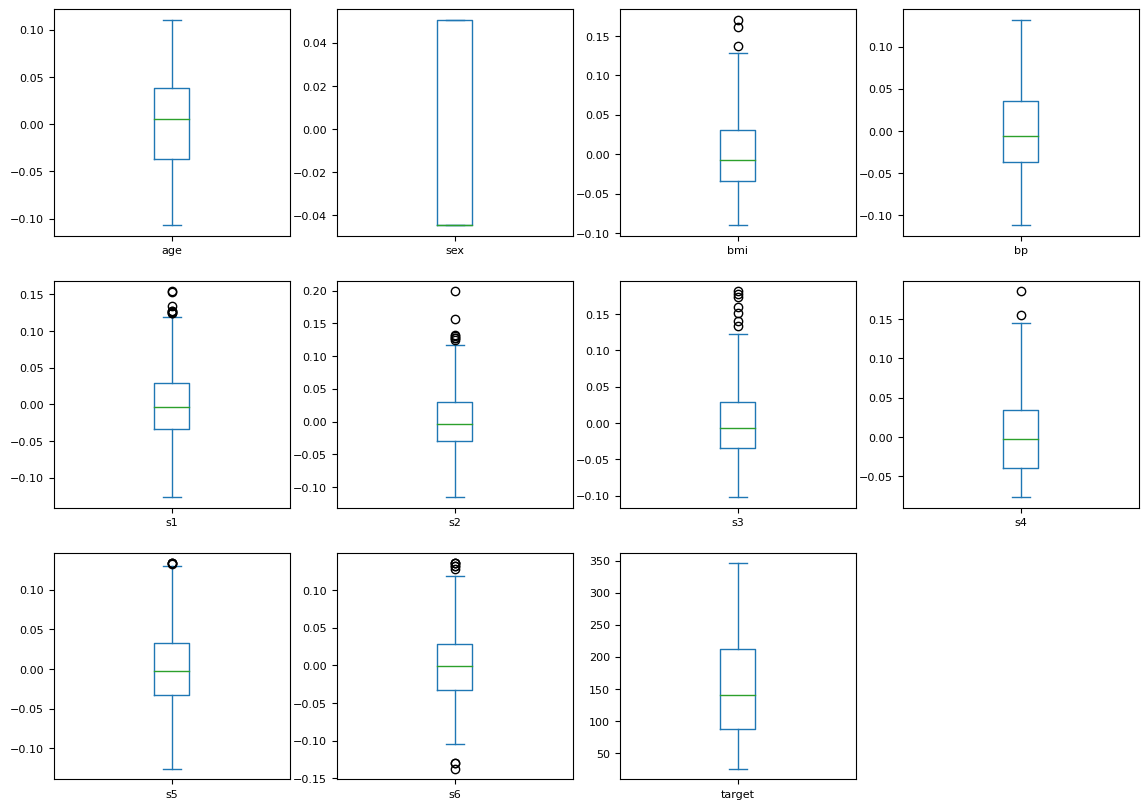

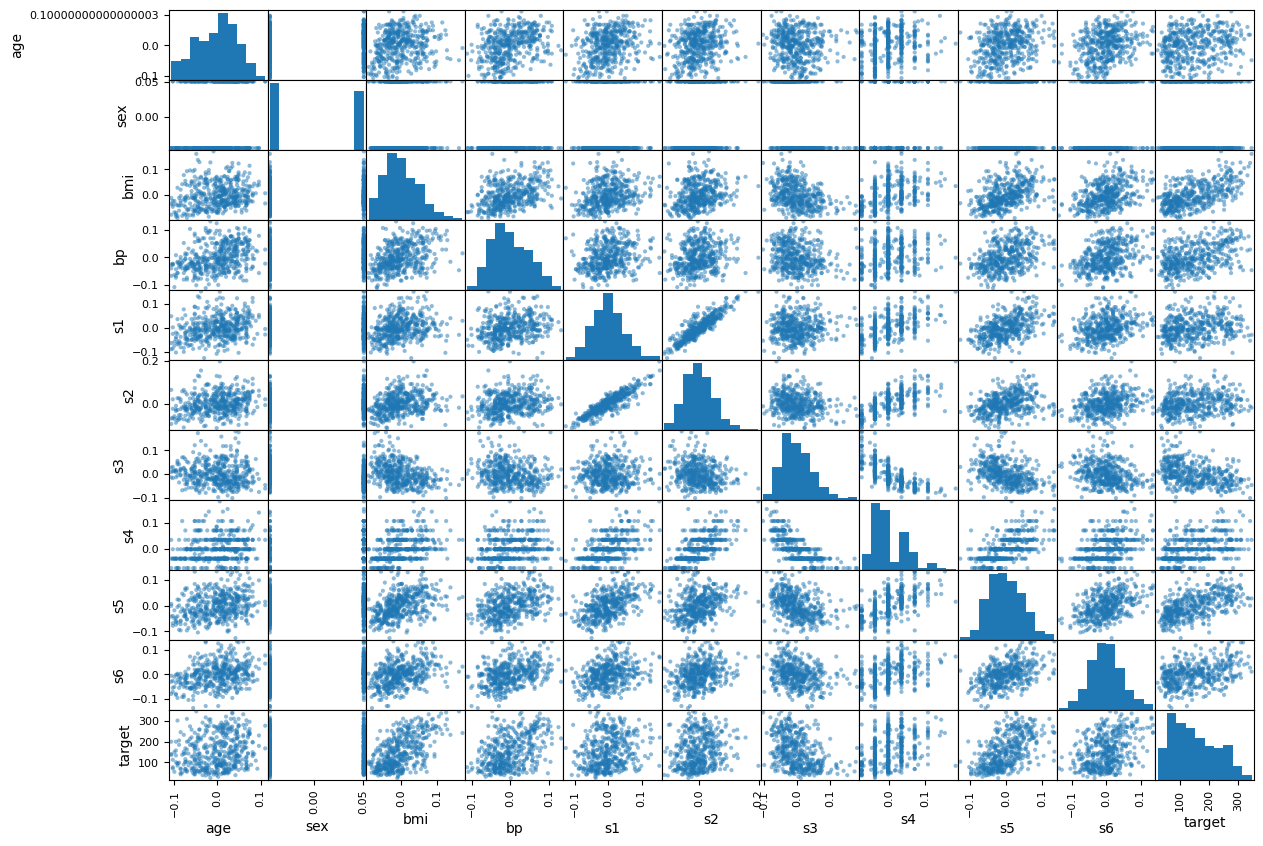

In [6]:
# histograms
dataset.hist(figsize=(14,10), sharex=False, 
sharey=False, xlabelsize=1, ylabelsize=1)
# density
dataset.plot(figsize=(14,10), kind='density', 
subplots=True, layout=(3,4), sharex=False, legend=True, 
fontsize=10)
# box and whisker plots
dataset.plot(figsize=(14,10), kind='box', subplots=True, 
layout=(3,4), sharex=False, sharey=False, fontsize=8)
# scatter plot matrix
scatter_matrix(dataset, figsize=(14,10))

[Text(0, 0, 'age'),
 Text(0, 1, 'sex'),
 Text(0, 2, 'bmi'),
 Text(0, 3, 'bp'),
 Text(0, 4, 's1'),
 Text(0, 5, 's2'),
 Text(0, 6, 's3'),
 Text(0, 7, 's4'),
 Text(0, 8, 's5'),
 Text(0, 9, 's6'),
 Text(0, 10, 'target')]

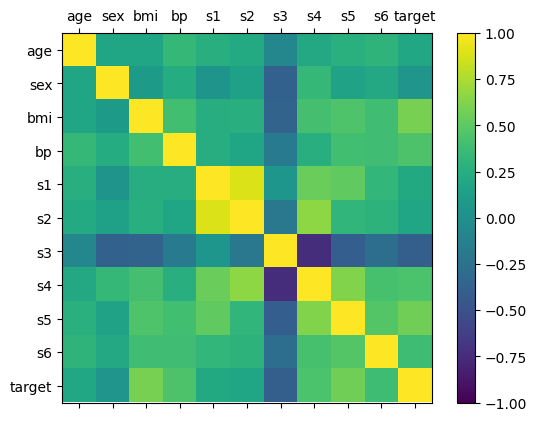

In [7]:
# correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(dataset.corr(), vmin=-1, vmax=1, 
interpolation='none')
fig.colorbar(cax)
ticks = arange(0,11,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(dataset.columns)
ax.set_yticklabels(dataset.columns)

In [8]:
# features = predictor/independent/explanatory variables
X = dataset.drop(columns=['target'])
print(X)
# target variable = dependent/response variable
y = dataset['target']
print(y)

       age    sex    bmi     bp     s1     s2     s3     s4     s5     s6
0    0.038  0.051  0.062  0.022 -0.044 -0.035 -0.043 -0.003  0.020 -0.018
1   -0.002 -0.045 -0.051 -0.026 -0.008 -0.019  0.074 -0.039 -0.068 -0.092
2    0.085  0.051  0.044 -0.006 -0.046 -0.034 -0.032 -0.003  0.003 -0.026
3   -0.089 -0.045 -0.012 -0.037  0.012  0.025 -0.036  0.034  0.023 -0.009
4    0.005 -0.045 -0.036  0.022  0.004  0.016  0.008 -0.003 -0.032 -0.047
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...
437  0.042  0.051  0.020  0.060 -0.006 -0.003 -0.029 -0.003  0.031  0.007
438 -0.006  0.051 -0.016 -0.068  0.049  0.079 -0.029  0.034 -0.018  0.044
439  0.042  0.051 -0.016  0.017 -0.037 -0.014 -0.025 -0.011 -0.047  0.015
440 -0.045 -0.045  0.039  0.001  0.016  0.015 -0.029  0.027  0.045 -0.026
441 -0.045 -0.045 -0.073 -0.081  0.084  0.028  0.174 -0.039 -0.004  0.003

[442 rows x 10 columns]
0      151.0
1       75.0
2      141.0
3      206.0
4      135.0
       ...  
437    17

In [9]:
# Split off test dataset
# 1/5 of the data will be used for testing
test_size = 0.20
seed = 42
# select 1/5 randomly and split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
test_size=test_size, random_state=seed)
print(X_train)
print(y_train)
print(X_test)
print(y_test)

       age    sex    bmi     bp     s1     s2     s3     s4         s5     s6
17   0.071  0.051  0.012  0.056  0.034  0.049 -0.040  0.034  2.736e-02 -0.001
66  -0.009  0.051 -0.018 -0.033 -0.021  0.012 -0.073  0.071  2.725e-04  0.020
137  0.005 -0.045  0.050  0.098 -0.015 -0.016 -0.007 -0.003  1.704e-02 -0.014
245 -0.027 -0.045 -0.035 -0.030 -0.057 -0.059  0.030 -0.039 -4.987e-02 -0.129
31  -0.024 -0.045 -0.065 -0.081 -0.039 -0.054  0.060 -0.076 -3.713e-02 -0.042
..     ...    ...    ...    ...    ...    ...    ...    ...        ...    ...
106 -0.096 -0.045 -0.076 -0.044 -0.046 -0.035  0.008 -0.039 -5.947e-02 -0.084
270  0.005  0.051  0.030  0.084 -0.037 -0.047  0.016 -0.039  8.641e-03  0.015
348  0.031 -0.045 -0.020 -0.006 -0.004 -0.029  0.078 -0.039 -1.090e-02 -0.001
435 -0.013 -0.045 -0.023 -0.040 -0.017  0.005 -0.018 -0.003 -3.846e-02 -0.038
102 -0.093 -0.045  0.028 -0.016  0.037  0.025  0.056 -0.039 -5.142e-03 -0.001

[353 rows x 10 columns]
17     144.0
66     150.0
137    280.0


In [11]:
# Test options and evaluation metric
num_folds = 10
seed = 42
scoring = 'neg_mean_squared_error'
# evaluate algorithms using the Mean Squared Error (MSE) metric. 
# MSE will give an idea of how wrong all estimates are (0 is perfect).
# The evaluation function assumes the greater the better, therefore, we use the NEGATIVE MSE.

In [12]:
# Algorithms
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('RIDGE', Ridge()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))

In [14]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
    # define how to split off validation data
    kfold = KFold(n_splits=num_folds, shuffle=True, 
    random_state=seed)
    # train the model
    cv_results = cross_val_score(model, X_train, 
    y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), 
    cv_results.std())
    print(msg)

LR: -3067.309455 (548.766691)
LASSO: -3955.772980 (789.991203)
RIDGE: -3536.969807 (762.881320)
EN: -6057.620153 (1173.727197)
KNN: -3838.726016 (622.060459)
CART: -7117.170159 (1307.149209)
SVR: -5222.153641 (1231.532964)


[array([-2850.93634514, -2778.8471288 , -3059.2425191 , -3323.85658043,
       -2991.75709994, -2645.21444149, -2773.23769556, -3391.42883755,
       -2385.71613032, -4472.85777471]), array([-3837.49920041, -3333.11533359, -4559.14693396, -4442.75978468,
       -3368.07740955, -3069.07632425, -3745.27744221, -4099.25593592,
       -3261.21084263, -5842.31059113]), array([-3089.16730042, -3086.47247204, -4117.09151438, -4298.26546133,
       -3297.40310475, -2569.37751837, -3702.26452082, -3292.89878162,
       -2720.51745297, -5196.23994287]), array([-6009.64073443, -5178.09300561, -7360.82966712, -6660.86678782,
       -5385.96032301, -4217.60878423, -5924.8834228 , -5885.51861509,
       -5338.4282008 , -8614.37198971]), array([-4000.70888889, -3298.78444444, -3981.40111111, -4440.45371429,
       -4100.37485714, -3727.66857143, -3072.82971429, -4157.85028571,
       -2708.67771429, -4898.51085714]), array([-7688.30555556, -5459.30555556, -9513.83333333, -8823.85714286,
       -6091.

[Text(1, 0, 'LR'),
 Text(2, 0, 'LASSO'),
 Text(3, 0, 'RIDGE'),
 Text(4, 0, 'EN'),
 Text(5, 0, 'KNN'),
 Text(6, 0, 'CART'),
 Text(7, 0, 'SVR')]

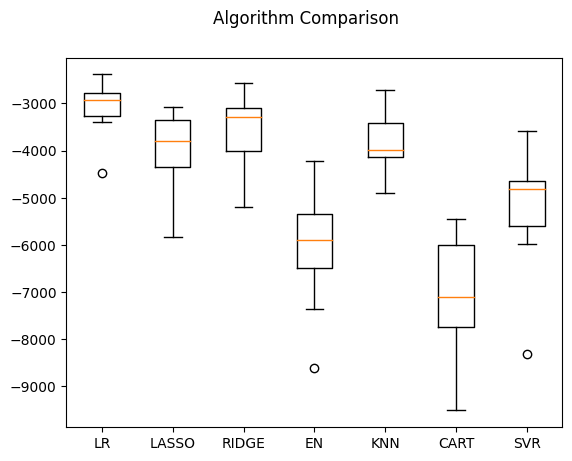

In [15]:
# Compare Algorithms
print(results)
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)

In [16]:
# Standardize the dataset first
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', 
StandardScaler()),('LR', LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', 
StandardScaler()),('LASSO', Lasso())])))
pipelines.append(('ScaledRIDGE', Pipeline([('Scaler', 
StandardScaler()),('RIDGE', Ridge())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', 
StandardScaler()),('EN', ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', 
StandardScaler()),('KNN', KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', 
StandardScaler()),('CART', DecisionTreeRegressor())])))
pipelines.append(('ScaledSVR', Pipeline([('Scaler', 
StandardScaler()),('SVR', SVR())])))

In [17]:
# evaluate each model in turn
results = []
names = []
for name, model in pipelines:
    # define how to split off validation data
    kfold = KFold(n_splits=num_folds, shuffle=True, 
    random_state=seed)
    # train the model
    cv_results = cross_val_score(model, X_train, 
    y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), 
    cv_results.std())
    print(msg)

ScaledLR: -3067.309455 (548.766691)
ScaledLASSO: -3081.954503 (552.647202)
ScaledRIDGE: -3065.785599 (552.154643)
ScaledEN: -3203.576023 (634.873924)
ScaledKNN: -3870.782267 (647.276382)
ScaledCART: -6704.928651 (1208.638809)
ScaledSVR: -5224.841458 (1231.377852)


[array([-2850.93634514, -2778.8471288 , -3059.2425191 , -3323.85658043,
       -2991.75709994, -2645.21444149, -2773.23769556, -3391.42883755,
       -2385.71613032, -4472.85777471]), array([-2854.89089791, -2791.71392979, -3064.51016143, -3366.89339326,
       -2920.53417315, -2659.13990024, -2929.676289  , -3379.63587574,
       -2357.8295358 , -4494.72087354]), array([-2849.56769379, -2782.04818575, -3038.30227061, -3329.69438739,
       -2984.90171111, -2635.49612419, -2794.09357832, -3377.31581186,
       -2380.00515869, -4486.43106331]), array([-2839.59380537, -2859.23641125, -3483.52739802, -3798.15673306,
       -3059.18974127, -2507.40031817, -3294.79537594, -3125.58210824,
       -2391.93928354, -4676.33905636]), array([-3742.45777778, -3286.54777778, -4060.56111111, -4616.57257143,
       -4067.48457143, -3923.65828571, -3154.38857143, -4114.00457143,
       -2725.25828571, -5016.88914286]), array([-7716.5       , -5423.55555556, -8876.91666667, -7573.37142857,
       -4975.

[Text(1, 0, 'ScaledLR'),
 Text(2, 0, 'ScaledLASSO'),
 Text(3, 0, 'ScaledRIDGE'),
 Text(4, 0, 'ScaledEN'),
 Text(5, 0, 'ScaledKNN'),
 Text(6, 0, 'ScaledCART'),
 Text(7, 0, 'ScaledSVR')]

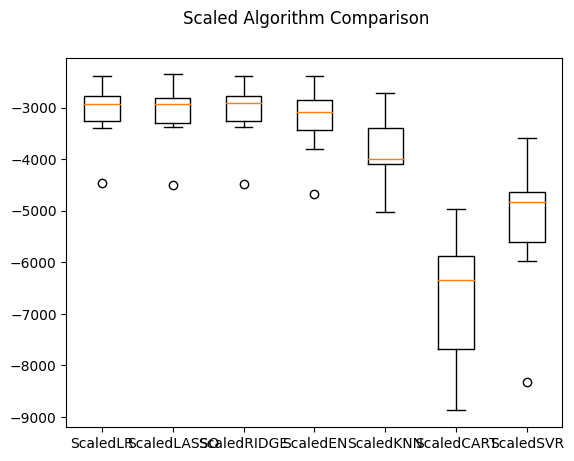

In [18]:
# Compare Algorithms
print(results)
fig = plt.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)

In [19]:
# Basic performance of CART using all training data without tuning!
# instantiate learning model
model = DecisionTreeRegressor()
# fitting the model
model.fit(X_train, y_train)
# estimate the response
estimates = model.predict(X_test)
print(estimates)
# evaluate performance
print(y_test)
print(mean_squared_error(y_test, estimates))

[190. 109. 170. 150. 139.  97. 237. 248. 179. 197. 113. 200.  74. 220.
  88. 113. 310. 180. 273. 163. 147.  59.  49. 150. 103. 127. 281. 162.
  59. 139. 279.  55. 172. 292. 164. 180.  64.  94. 120.  65.  39.  66.
 199. 131. 170.  75.  31. 148.  45. 200. 142.  72. 201. 148. 292. 141.
  53. 221.  53.  57.  67. 147. 142.  85. 151. 178.  58.  69. 185. 179.
 179. 215. 241. 162. 132. 292. 217. 178. 122. 248.  49.  25.  57.  39.
  49.  52.  74.  74. 147.]
287    219.0
211     70.0
72     202.0
321    230.0
73     111.0
       ...  
255    153.0
90      98.0
57      37.0
391     63.0
24     184.0
Name: target, Length: 89, dtype: float64
5110.044943820225


In [20]:
# Exhaustive grid search to fine tune method parameters
# Start with an initial guess for parameters
param_grid = {
'max_depth': [10, 20, 30, 40], 
'min_samples_split': [20, 40, 60, 80, 100], 
'min_impurity_decrease': [0, 0.0005, 0.001, 0.005, 
0.01] }
gridSearch = GridSearchCV(DecisionTreeRegressor(), 
param_grid, scoring=scoring, cv=5) 
grid_result = gridSearch.fit(X_train, y_train)
print('Initial score: ', grid_result.best_score_)
print('Initial parameters: ', grid_result.best_params_)

Initial score:  -3944.1884520105355
Initial parameters:  {'max_depth': 10, 'min_impurity_decrease': 0, 'min_samples_split': 100}


In [21]:
# Adapt grid based on result from initial grid search
param_grid = {
'max_depth': list(range(2, 16)),
'min_samples_split': list(range(90, 110)),
'min_impurity_decrease': [0, 0.0001, 0.0002, 
0.0003, 0.0004, 0.0005]
}
gridSearch = GridSearchCV(DecisionTreeRegressor(), 
param_grid, scoring=scoring, cv=5) 
grid_result = gridSearch.fit(X_train, y_train)
print('Improved score: ', grid_result.best_score_)
print('Improved parameters: ', 
grid_result.best_params_)

Improved score:  -3774.447896831778
Improved parameters:  {'max_depth': 2, 'min_impurity_decrease': 0, 'min_samples_split': 90}


In [ ]:
# all
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [22]:
# instantiate learning model
model = DecisionTreeRegressor(max_depth=2, 
min_impurity_decrease=0, min_samples_split=90)
# fitting the model
model.fit(X_train, y_train)
# predict the response
estimates = model.predict(X_test)
print(estimates)
# evaluate performance
print(y_test)
print(mean_squared_error(y_test, estimates))

[164.66666667 191.10169492 164.66666667 191.10169492 100.55921053
 100.55921053 271.07692308 191.10169492 164.66666667 191.10169492
 100.55921053 164.66666667 100.55921053 191.10169492 100.55921053
 191.10169492 191.10169492 271.07692308 191.10169492 191.10169492
 191.10169492 100.55921053 100.55921053 191.10169492 191.10169492
 191.10169492 191.10169492 100.55921053 100.55921053 100.55921053
 271.07692308 100.55921053 191.10169492 164.66666667 191.10169492
 271.07692308 100.55921053 164.66666667 164.66666667 100.55921053
 100.55921053 100.55921053 100.55921053 164.66666667 164.66666667
 100.55921053 100.55921053 100.55921053 100.55921053 164.66666667
 191.10169492 100.55921053 191.10169492 100.55921053 164.66666667
 191.10169492 100.55921053 191.10169492 100.55921053 100.55921053
 191.10169492 191.10169492 191.10169492 100.55921053 164.66666667
 191.10169492 164.66666667 164.66666667 100.55921053 164.66666667
 164.66666667 191.10169492 164.66666667 100.55921053 100.55921053
 164.66666

In [23]:
# Compute mean and std dev to be used for later scaling
scaler = StandardScaler().fit(X_train)
# Perform standardization by centering and scaling
rescaledX_train = scaler.transform(X_train)
# Possible values for k
k_values = np.array([1,3,5,7,9,11,13,15,17,19,21])
# grid of parameters (as dictionary as required later)
param_grid = dict(n_neighbors=k_values)
# set model to KNN regressor
model = KNeighborsRegressor()

In [27]:
# set up kfold for cross validation
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
# set up grid search to try each given value of k 
# using cross validation
grid = GridSearchCV(estimator=model, 
param_grid=param_grid, scoring=scoring, cv=kfold)
# fit training data and get results
grid_result = grid.fit(rescaledX_train, y_train)
# best result
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: -3361.764049 using {'n_neighbors': 15}


-6237.442143 (1822.943090) with: {'n_neighbors': 1}
-4249.056843 (924.877027) with: {'n_neighbors': 3}
-3902.622546 (665.548220) with: {'n_neighbors': 5}
-3472.140105 (549.568712) with: {'n_neighbors': 7}
-3549.695181 (609.916456) with: {'n_neighbors': 9}
-3459.008656 (607.489160) with: {'n_neighbors': 11}
-3408.448989 (640.607955) with: {'n_neighbors': 13}
-3361.764049 (671.661747) with: {'n_neighbors': 15}
-3387.394767 (758.388516) with: {'n_neighbors': 17}
-3397.046236 (722.230704) with: {'n_neighbors': 19}
-3394.792582 (783.577305) with: {'n_neighbors': 21}


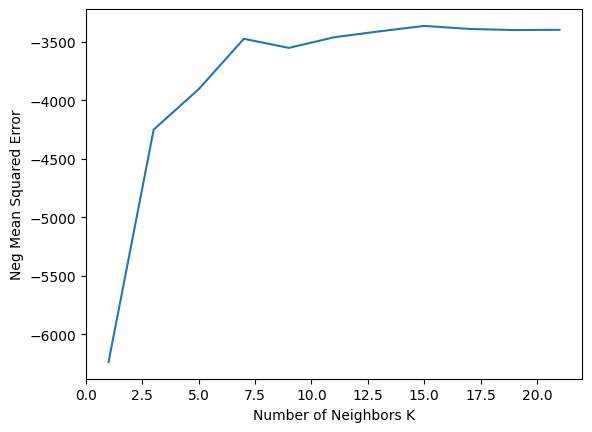

In [28]:
# all
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
# plot k vs error
plt.plot(k_values, means)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Neg Mean Squared Error')
plt.show()

In [29]:
# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX_train = scaler.transform(X_train)
# calculate estimates for test dataset
# instantiate learning model
model = KNeighborsRegressor(n_neighbors=3)
# fitting the model
model.fit(rescaledX_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [30]:
# transform the test dataset
rescaledX_test = scaler.transform(X_test)
# estimate the response
estimates = model.predict(rescaledX_test)
print(estimates)
# evaluate performance
print(y_test)
print(mean_squared_error(y_test, estimates))

[137.33333333 128.66666667 145.         239.         168.66666667
 131.33333333 239.66666667 177.66666667  98.          80.66666667
  72.         135.33333333 120.66666667 196.66666667  67.
 133.33333333 263.         262.33333333 207.33333333 256.66666667
 150.66666667  72.66666667  94.33333333 192.         132.66666667
 145.66666667 176.66666667 158.33333333  67.66666667 108.33333333
 134.         142.33333333  83.33333333 196.66666667 143.
 246.          73.66666667 168.66666667 170.66666667  96.33333333
  84.33333333 113.66666667 133.         107.33333333 211.
  77.          61.          71.         101.66666667 133.33333333
 138.66666667 106.         145.         125.33333333 168.66666667
 143.33333333  68.33333333 164.33333333 151.33333333  72.
 145.66666667 108.          64.66666667  73.66666667 142.33333333
 148.66666667 211.33333333 152.         159.         108.66666667
 108.66666667 197.66666667 188.          75.          88.
 208.66666667 177.66666667 168.         213.333333